# torch.nn.Linear

`torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)`

- 입력된 데이터의 가장 낮은 차원에 선형 변환(linear transformation)을 적용한다.
- $x$가 입력, $A$가 가중치, $b$가 편향, $y$가 출력일 때,
  $$y = xW^T + b$$
- `in_features`는 입력 샘플의 사이즈이다. `out_features`는 출력 샘플의 사이즈이다.
- 모델의 가중치 텐서의 크기는 `(out_features, in_features)`가 된다.
- 다음 코드를 통해 이 관계가 사실임을 확인할 수 있다.

In [94]:
import torch.nn as nn
for in_feature in range(1, 4):
    for out_feature in range(1, 4):
        assert(nn.Linear(in_feature,out_feature).weight.shape == (out_feature, in_feature))

- 예를 들어, 입력 샘플의 크기가 4, 출력 샘플의 크기가 3일 경우 다음과 같이 정리할 수 있다.
  - 입력 : $\vec{x} = (x_0, x_1, x_2, x_3)$는 크키가 4인 벡터이다.
  - 출력 : $\vec{y} = (y_0, y_1, y_2)$는 크기가 3인 벡터이다.
  - 모델 : 
    - 편향 $\vec{b} = (b_0, b_1, b_2)$
    - 가중치 $W$는 (4x3) 행렬이다.
  - $\vec{y} = \vec{x}W^T + \vec{b}$이다.
  - 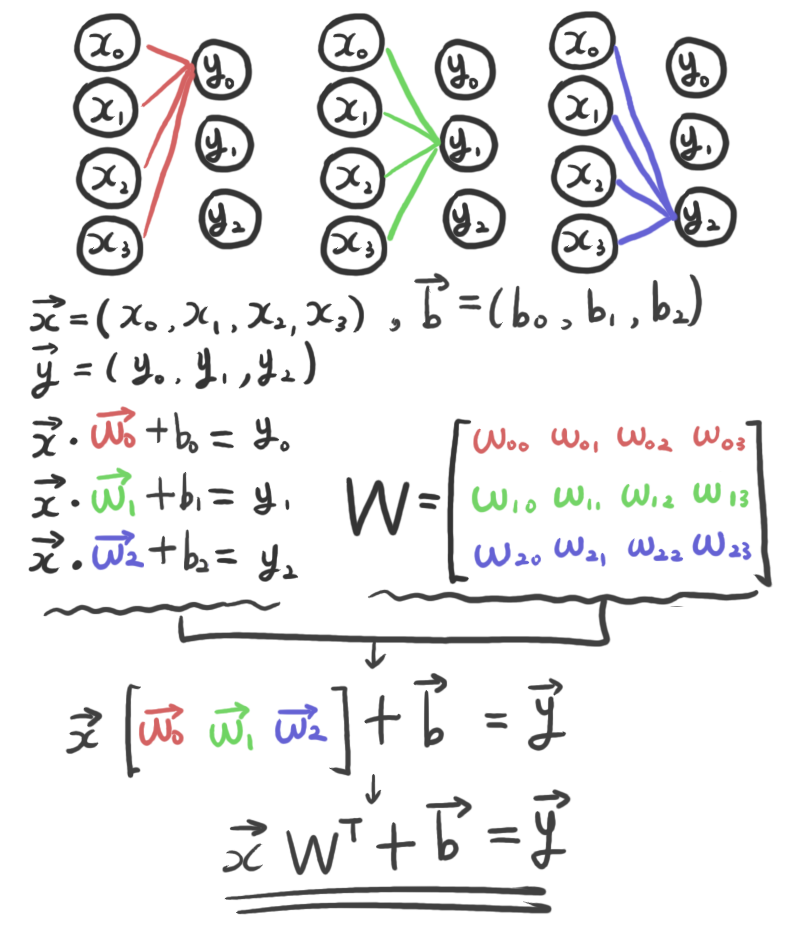


$$
\begin{bmatrix}1&0&1&0\end{bmatrix}
\begin{bmatrix}
1&5&9\\
2&6&10\\
3&7&11\\
4&8&12
\end{bmatrix}
+
\begin{bmatrix}
0.1&0.2&0.3
\end{bmatrix}
=
\begin{bmatrix}
4.1&12.2&20.3
\end{bmatrix}

$$


In [95]:
import torch
import torch.nn as nn
in_features = 4
out_features = 3
m = nn.Linear(in_features, out_features)
m.weight = torch.nn.Parameter(torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]).float())
m.bias = torch.nn.Parameter(torch.tensor([0.1, 0.2, 0.3]))
input = torch.tensor([1, 0, 1, 0]).float()
print(" *  input : \n", input, input.shape, end= '\n\n')
print(" * wieght : \n", m.weight, m.weight.shape, end= '\n\n')
print(" *   bias : \n", m.bias, m.bias.shape, end= '\n\n')
output = m(input)
print(" * output : \n", output, output.shape, end= '\n\n')

 *  input : 
 tensor([1., 0., 1., 0.]) torch.Size([4])

 * wieght : 
 Parameter containing:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], requires_grad=True) torch.Size([3, 4])

 *   bias : 
 Parameter containing:
tensor([0.1000, 0.2000, 0.3000], requires_grad=True) torch.Size([3])

 * output : 
 tensor([ 4.1000, 12.2000, 20.3000], grad_fn=<AddBackward0>) torch.Size([3])



- 이렇게 만들어진 모델을, 단지 벡터 하나에만 적용하기 위해 사용할 필요는 없다.
- 예를 들어 입력이 행렬일 경우, 각 행이 하나의 $\vec{x}$벡터가 된다.
- 다음 예시 코드에서, 첫번째 행에 대한 출력은 이전 코드의 실행 결과와 같다.

$$
XW^T + B = Y\\[1.2em]
\begin{bmatrix}
1&0&1&0\\
0&1&0&1\\
1&0&0&1\\
0&1&1&0
\end{bmatrix}
\begin{bmatrix}
1&5&9\\
2&6&10\\
3&7&11\\
4&8&12
\end{bmatrix}
\begin{bmatrix}
0.1 & 0.2 & 0.3\\
0.1 & 0.2 & 0.3\\
0.1 & 0.2 & 0.3\\
0.1 & 0.2 & 0.3\\
\end{bmatrix}
=
\begin{bmatrix}
4.1&12.2&20.3\\
6.1&14.2&22.3\\
5.1&13.2&21.3\\
5.1&13.2&21.3\\
\end{bmatrix}
$$

In [100]:
input = torch.tensor([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]).float()
output = m(input)
print(output)

tensor([[ 4.1000, 12.2000, 20.3000],
        [ 6.1000, 14.2000, 22.3000],
        [ 5.1000, 13.2000, 21.3000],
        [ 5.1000, 13.2000, 21.3000]], grad_fn=<AddmmBackward0>)
